In [151]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve

# Use the “pima-indians-diabetes.csv” dataset and note down the meta information.

In [25]:
diabetes = pd.read_csv("diabetes.csv")
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


###  1. Title: Pima Indians Diabetes Database

 
### 2. Sources:

    (a) Original owners: National Institute of Diabetes and Digestive and

                         Kidney Diseases

    (b) Donor of database: Vincent Sigillito (vgs@aplcen.apl.jhu.edu)

                           Research Center, RMI Group Leader

                           Applied Physics Laboratory

                           The Johns Hopkins University

                           Johns Hopkins Road

                           Laurel, MD 20707

                           (301) 953-6231

    (c) Date received: 9 May 1990

 

### 3. Past Usage:

     1. Smith,~J.~W., Everhart,~J.~E., Dickson,~W.~C., Knowler,~W.~C., \&

        Johannes,~R.~S. (1988). Using the ADAP learning algorithm to forecast

        the onset of diabetes mellitus.  In {\it Proceedings of the Symposium

        on Computer Applications and Medical Care} (pp. 261--265).  IEEE

        Computer Society Press.

 

        The diagnostic, binary-valued variable investigated is whether the

        patient shows signs of diabetes according to World Health Organization

        criteria (i.e., if the 2 hour post-load plasma glucose was at least 

        200 mg/dl at any survey  examination or if found during routine medical

        care).   The population lives near Phoenix, Arizona, USA.

 

        Results: Their ADAP algorithm makes a real-valued prediction between

        0 and 1.  This was transformed into a binary decision using a cutoff of 

        0.448.  Using 576 training instances, the sensitivity and specificity

        of their algorithm was 76
 

### 4. Relevant Information:

       Several constraints were placed on the selection of these instances from

       a larger database.  In particular, all patients here are females at

       least 21 years old of Pima Indian heritage.  ADAP is an adaptive learning

       routine that generates and executes digital analogs of perceptron-like

       devices.  It is a unique algorithm; see the paper for details.

 

### 5. Number of Instances: 768

 

### 6. Number of Attributes: 8 plus class 

 

### 7. For Each Attribute: (all numeric-valued)

    1. Number of times pregnant

    2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test

    3. Diastolic blood pressure (mm Hg)

    4. Triceps skin fold thickness (mm)

    5. 2-Hour serum insulin (mu U/ml)

    6. Body mass index (weight in kg/(height in m)^2)

    7. Diabetes pedigree function

    8. Age (years)

    9. Class variable (0 or 1)

 

### 8. Missing Attribute Values: None

 

### 9. Class Distribution: (class value 1 is interpreted as "tested positive for

    diabetes")

 

    Class Value  Number of instances

    0            500

    1            268

 

### 10. Brief statistical analysis:

 

     Attribute number:    Mean:   Standard Deviation:

     1.                     3.8     3.4

     2.                   120.9    32.0

     3.                    69.1    19.4

     4.                    20.5    16.0

     5.                    79.8   115.2

     6.                    32.0     7.9

     7.                     0.5     0.3

     8.                    33.2    11.8


### Relabeled values in attribute 'class'

    From: 0                       To: tested_negative     

    From: 1                       To: tested_positive  

# Compute mean & standard deviation ,tabulate and visualize the age of the patients.

In [16]:
diabetes.Age.describe()

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Density'>

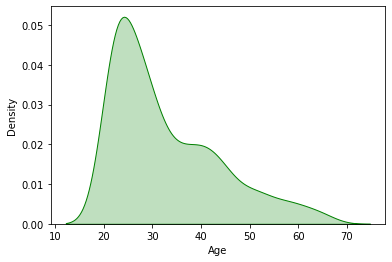

In [185]:
sns.kdeplot(data = diabetes.Age, color = 'green', shade = True)

# Analyze and tabulate therelationship of age,BMI of patientswith respect to the class.

In [73]:
def outlier_normalisation(data):
    upper = data.quantile(0.75)
    lower = data.quantile(0.25)
    iqr = upper - lower
    factor = iqr * 1.5
    cond = (data >= upper + factor) | (data <= lower - factor)
    data.loc[cond] = data.median()
    return data



diabetes[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']] = diabetes[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']].apply(outlier_normalisation)

In [74]:
contigency_1 = pd.crosstab(index = diabetes["Outcome"], columns = diabetes["BMI"])
contigency_2 = pd.crosstab(index = diabetes["Outcome"], columns = diabetes["Age"])

In [75]:
c, p, dof, expected = chi2_contingency(contigency_1)
print("P-value = ", p)

P-value =  0.05271826184548281


In [76]:
c, p, dof, expected = chi2_contingency(contigency_2)
print("P-value = ", p)

P-value =  5.354261982147526e-11


<Figure size 720x720 with 0 Axes>

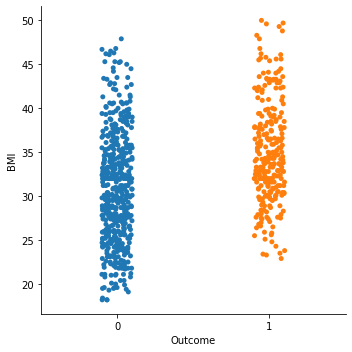

In [107]:
plt.figure(figsize = (10,10))
g = sns.catplot(data = diabetes , x= 'Outcome', y = 'BMI')

<Figure size 720x720 with 0 Axes>

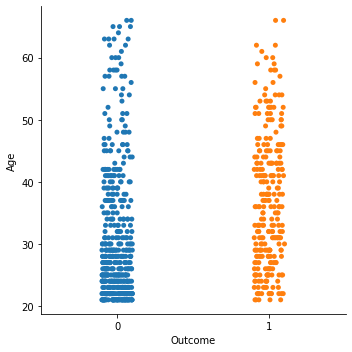

In [117]:
plt.figure(figsize = (10,10))
g = sns.catplot(data = diabetes, x='Outcome', y= 'Age')
plt.show()

# Tabulate the class label and comment on whether the classes are balanced.

In [32]:
diabetes.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

### Since the values are not exceeding '1' or '0' therefore the Outcome (class) is balanced

# Use the data set to build a logistic regression model (using sklearn) and predict the class label. Divide the dataset into training and test set (70,30) using train_test_splitmethod in sklearn. 

In [79]:
X = diabetes.iloc[:,0:8]
Y = diabetes['Outcome']

X = np.array(X)
Y = np.array(Y)

print(X.shape)
print(Y.shape)

(768, 8)
(768,)


In [187]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)

logreg = LogisticRegression(max_iter = 10000).fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
score = logreg.score(X_test, Y_test)
print("Score = ", score)

Score =  0.7662337662337663


# Use the test data set and evaluate the performance using a confusion matrix. Visualize the confusion matrix using a heat map.

In [147]:
cf_matrix = confusion_matrix(Y_test, Y_pred)
cf_matrix

array([[137,  20],
       [ 34,  40]], dtype=int64)

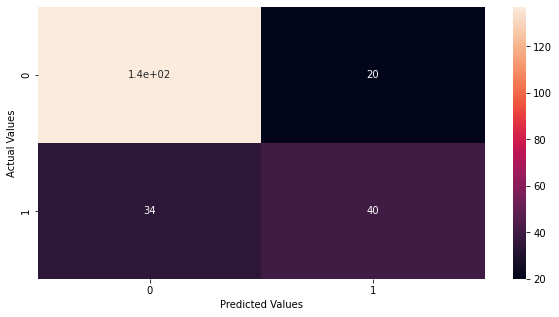

In [148]:
plt.figure(figsize = (10,5))
g = sns.heatmap(cf_matrix, annot = True)
g.set_xlabel("Predicted Values")
g.set_ylabel("Actual Values")
plt.show()

# Compute accuracy rate, true positive and true negative rate and comment on the performance

In [149]:
TN = cf_matrix[0,0]
TP = cf_matrix[1,0]
FP = cf_matrix[0,1]
FN = cf_matrix[1,1]

TPR = TP / (TP+FN)
TNR = TN / (TN+FP)
Accuracy = (TP+TN) / (TP+TN+FP+FN)
print("True Positive Rate = ", TPR)
print("True Negative Rate = ", TNR)
print("Accuracy = ", Accuracy)

True Positive Rate =  0.4594594594594595
True Negative Rate =  0.8726114649681529
Accuracy =  0.7402597402597403


# Visualize the ROC curve, and comment on the performance of the classifier.

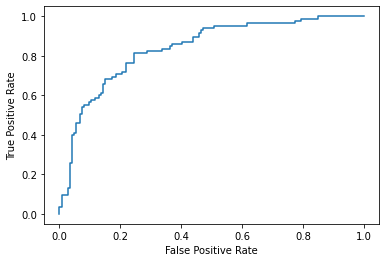

In [188]:
Y_pred_proba = logreg.predict_proba(X_test)[::, 1]
fpr, tpr, _ = roc_curve(Y_test, Y_pred_proba)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()